# Initialization

In [1]:
import TensorFlow
import Python

%include "InitMagic.swift"

# Define model parameters

In [2]:
struct Linear : ParameterGroup {
    var w, b: Tensor<Float>
}

# Define model

In [3]:
%include "PreModelMagic.swift"

extension Linear : Model {
    func applied(to inputs: Tensor<Float>) -> Tensor<Float> {
        return inputs • w + b
    }
    
    func loss(for predictions: Tensor<Float>,
              withLabels labels: Tensor<Float>) -> Float {
        return (predictions - labels).squared().mean()
    }
}

%include "PostModelMagic.swift"

In [4]:
var model = Linear(w: 2 * Tensor<Float>(randomUniform: [13, 1]) - 1,
                   b: Tensor<Float>(0))
print(model)

Linear(w: [[-0.5707623], [-0.7553866], [-0.8629298], [0.84251416], [0.10794926], [0.54900026], [0.85056233], [0.12461448], [-0.3595295], [0.4864558], [-0.72442555], [0.6776694], [-0.48176754]], b: 0.0)


# Gradient (AutoDiff)

In [5]:
print(model.lossAndGradient(for: inputs, withLabels: labels))

(452.65823, __lldb_expr_10.Linear(w: [[18.305069], [15.504682], [16.192005], [19.079586], [18.94672], [17.319672], [0.48463237], [17.975569], [16.78083], [-87.89311], [13.94985], [-82.35222], [15.706714]], b: -38.370808))


# Training Loop

In [6]:
var sgd = SGD(learningRate: 0.001)
let stepCount = 500
var lossValues: [Float] = []
for step in 0..<stepCount {
    let (loss, gradient) = model.lossAndGradient(for: inputs,
                                                 withLabels: labels)
    lossValues.append(loss)
    if step % 100 == 0 {
        print("Step \(step) loss: \(loss)")
    }
    sgd.fit(&model, withGradients: gradient)
}

Step 0 loss: 452.65823
Step 100 loss: 88.49953
Step 200 loss: 86.27703
Step 300 loss: 86.08224
Step 400 loss: 85.958015


# Plot loss using matplotlib (Python interop)

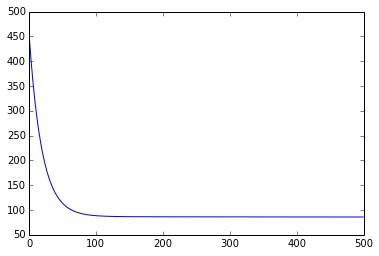

None


In [7]:
let plt = Python.import("matplotlib.pyplot")
plt.plot(lossValues)
plt.show()

In [8]:
/** Comments

python interoperability -> fully integrated with python

why do you care? eg:
- syntax completion
- compiler errors (e.g. intentionally mistype)

*/